In [109]:
import pandas as pd


In [110]:
df=pd.read_csv('/content/spam.csv',encoding='latin-1')
df.head()

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN


In [111]:
df=df.drop(columns=['Unnamed: 2','Unnamed: 3','Unnamed: 4'])

In [112]:
df.columns=["label","message"]
df.head()


,label,message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [113]:
#data cleaning and text processing
import re
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [114]:
from nltk.corpus import stopwords
stopwords.words('english')

['i',
 'me',
 'my',
 'myself',
 'we',
 'our',
 'ours',
 'ourselves',
 'you',
 "you're",
 "you've",
 "you'll",
 "you'd",
 'your',
 'yours',
 'yourself',
 'yourselves',
 'he',
 'him',
 'his',
 'himself',
 'she',
 "she's",
 'her',
 'hers',
 'herself',
 'it',
 "it's",
 'its',
 'itself',
 'they',
 'them',
 'their',
 'theirs',
 'themselves',
 'what',
 'which',
 'who',
 'whom',
 'this',
 'that',
 "that'll",
 'these',
 'those',
 'am',
 'is',
 'are',
 'was',
 'were',
 'be',
 'been',
 'being',
 'have',
 'has',
 'had',
 'having',
 'do',
 'does',
 'did',
 'doing',
 'a',
 'an',
 'the',
 'and',
 'but',
 'if',
 'or',
 'because',
 'as',
 'until',
 'while',
 'of',
 'at',
 'by',
 'for',
 'with',
 'about',
 'against',
 'between',
 'into',
 'through',
 'during',
 'before',
 'after',
 'above',
 'below',
 'to',
 'from',
 'up',
 'down',
 'in',
 'out',
 'on',
 'off',
 'over',
 'under',
 'again',
 'further',
 'then',
 'once',
 'here',
 'there',
 'when',
 'where',
 'why',
 'how',
 'all',
 'any',
 'both',
 'each

In [115]:
df.head()

,label,message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [116]:
stop_words=['i',
'me',
'my',
'myself',
'we',
'our',
'ours',
'ourselves',
'you',
"you're",
"you've",
"you'll",
"you'd",
'your',
'yours',
'yourself',
'yourselves',
'he',
'him',
'his',
'himself',
'she',
"she's",
'her',
'hers',
'herself',
'it',
"it's",
'its',
'itself',
'they',
'them',
'their',
'theirs',
'themselves',
'what',
'which',
'who',
'whom',
'this',
'that',
"that'll",
'these',
'those',
'am',
'is',
'are',
'was',
'were',
'be',
'been',
'being',
'have',
'has',
'had',
'having',

'does',
'did',
'doing',
'a',
'an',
'the',
'and',
'but',
'if',
'or',
'because',
'as',
'until',
'while',
'of',
'at',
'by',
'for',
'with',
'about',
'against',
'between',
'into',
'through',
'during',
'before',
'after',
'above',
'below',
'to',
'from',
'up',
'down',
'in',
'out',
'on',
'off',
'over',
'under',
'again',
'further',
'then',
'once',
'here',
'there',
'when',
'where',
'why',
'how',
'all',
'any',
'both',
'each',
'few',
'more',
'most',
'other',
'some',
'such',
'nor',
'not',
'only',
'own',
'same',
'so',
'than',
'too',
'very',
's',
't',
'can',
'will',
'just',
'should',
"should've",
'now',
'd',
'll',
'm',
'o',
're',
've',
'y',
'isn',
"isn't",
'ma',
'mightn',
"mightn't",
'mustn',
"mustn't",
'needn',
"needn't",
'shan',
"shan't",
'shouldn',
"shouldn't",
'wasn',
"wasn't",
'weren',
"weren't",
'won',
"won't",
'wouldn',
"wouldn't"]

In [117]:
stop_words

['i',
 'me',
 'my',
 'myself',
 'we',
 'our',
 'ours',
 'ourselves',
 'you',
 "you're",
 "you've",
 "you'll",
 "you'd",
 'your',
 'yours',
 'yourself',
 'yourselves',
 'he',
 'him',
 'his',
 'himself',
 'she',
 "she's",
 'her',
 'hers',
 'herself',
 'it',
 "it's",
 'its',
 'itself',
 'they',
 'them',
 'their',
 'theirs',
 'themselves',
 'what',
 'which',
 'who',
 'whom',
 'this',
 'that',
 "that'll",
 'these',
 'those',
 'am',
 'is',
 'are',
 'was',
 'were',
 'be',
 'been',
 'being',
 'have',
 'has',
 'had',
 'having',
 'does',
 'did',
 'doing',
 'a',
 'an',
 'the',
 'and',
 'but',
 'if',
 'or',
 'because',
 'as',
 'until',
 'while',
 'of',
 'at',
 'by',
 'for',
 'with',
 'about',
 'against',
 'between',
 'into',
 'through',
 'during',
 'before',
 'after',
 'above',
 'below',
 'to',
 'from',
 'up',
 'down',
 'in',
 'out',
 'on',
 'off',
 'over',
 'under',
 'again',
 'further',
 'then',
 'once',
 'here',
 'there',
 'when',
 'where',
 'why',
 'how',
 'all',
 'any',
 'both',
 'each',
 'fe

In [118]:
from nltk.stem.porter import PorterStemmer
ps= PorterStemmer()

In [119]:
corpus=[]
for i in range(0,len(df)):
 review= re.sub('[^a-zA-Z0-9]',' ',df['message'][i])
 review= review.lower()
 review=review.split()
 review=[ps.stem(word) for word in review if not word in stop_words]
 review=' '.join(review)
 corpus.append(review)


In [120]:
corpus

['go jurong point crazi avail bugi n great world la e buffet cine got amor wat',
 'ok lar joke wif u oni',
 'free entri 2 wkli comp win fa cup final tkt 21st may 2005 text fa 87121 receiv entri question std txt rate c appli 08452810075over18',
 'u dun say earli hor u c alreadi say',
 'nah don think goe usf live around though',
 'freemsg hey darl 3 week no word back like fun still tb ok xxx std chg send 1 50 rcv',
 'even brother like speak treat like aid patent',
 'per request mell mell oru minnaminungint nurungu vettam set callertun caller press 9 copi friend callertun',
 'winner valu network custom select receivea 900 prize reward claim call 09061701461 claim code kl341 valid 12 hour',
 'mobil 11 month u r entitl updat latest colour mobil camera free call mobil updat co free 08002986030',
 'gonna home soon don want talk stuff anymor tonight k cri enough today',
 'six chanc win cash 100 20 000 pound txt csh11 send 87575 cost 150p day 6day 16 tsandc appli repli hl 4 info',
 'urgent 1 we

In [121]:
#train test split

In [122]:
y=pd.get_dummies(df['label'],drop_first=True)
y.head()
x=corpus

In [123]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(
    x, y, test_size=0.33, random_state=42)


In [124]:
x_train

['aight text back mu swing need somebodi get door',
 'cant wait see photo use',
 'kothi print marandratha',
 'effect irrit ignor',
 'kalli wont bat 2nd inning',
 'rington club gr8 new poli direct mobil everi week',
 'ha ha cool cool chikku chikku db',
 'no sir 8 hr trip bu last week anoth audit next wednesday think might drive time',
 'r go send',
 'oki',
 'call freephon 0800 542 0578',
 'left vagu said would inform person account delay rent discuss hous agenc rent anoth place check onlin place around usc lt gt',
 'mmmmmm love much ahmad wait year begin everi second take closer side happi new year love',
 'sad stori man last week b day wife nt wish parent forgot n kid went work even colleagu wish enter cabin pa said happi b day boss felt special askd 4 lunch lunch invit apart went said do u mind go bedroom minut ok sed sexi mood came 5 minut latr wid cake n wife parent kidz friend n colleagu scream surpris wait sofa nake',
 'plan famili set stone',
 'okay lor still let us go ah coz kno

In [125]:
df['label'].value_counts()

,count
label,
ham,4825
spam,747


The dataset is imbalanced

In [126]:
#creat bow
from sklearn.feature_extraction.text import CountVectorizer
cv=CountVectorizer(max_features=2500,ngram_range=(1,2))
x_train=cv.fit_transform(x_train).toarray()
x_train

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]])

In [127]:
x_test=cv.transform(x_test).toarray()
x_test

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]])

In [128]:
x

['go jurong point crazi avail bugi n great world la e buffet cine got amor wat',
 'ok lar joke wif u oni',
 'free entri 2 wkli comp win fa cup final tkt 21st may 2005 text fa 87121 receiv entri question std txt rate c appli 08452810075over18',
 'u dun say earli hor u c alreadi say',
 'nah don think goe usf live around though',
 'freemsg hey darl 3 week no word back like fun still tb ok xxx std chg send 1 50 rcv',
 'even brother like speak treat like aid patent',
 'per request mell mell oru minnaminungint nurungu vettam set callertun caller press 9 copi friend callertun',
 'winner valu network custom select receivea 900 prize reward claim call 09061701461 claim code kl341 valid 12 hour',
 'mobil 11 month u r entitl updat latest colour mobil camera free call mobil updat co free 08002986030',
 'gonna home soon don want talk stuff anymor tonight k cri enough today',
 'six chanc win cash 100 20 000 pound txt csh11 send 87575 cost 150p day 6day 16 tsandc appli repli hl 4 info',
 'urgent 1 we

In [129]:
x_train.shape

(3733, 2500)

In [130]:
cv.vocabulary_

{'aight': 211,
 'text': 2071,
 'back': 285,
 'mu': 1452,
 'swing': 2045,
 'need': 1471,
 'somebodi': 1955,
 'get': 921,
 'door': 734,
 'text back': 2072,
 'cant': 458,
 'wait': 2337,
 'see': 1864,
 'photo': 1668,
 'use': 2287,
 'cant wait': 462,
 'effect': 765,
 'irrit': 1127,
 'ignor': 1099,
 'kalli': 1147,
 'wont': 2447,
 'bat': 299,
 '2nd': 88,
 'rington': 1815,
 'club': 544,
 'gr8': 974,
 'new': 1481,
 'poli': 1707,
 'direct': 696,
 'mobil': 1415,
 'everi': 797,
 'week': 2392,
 'everi week': 799,
 'ha': 1002,
 'cool': 606,
 'chikku': 513,
 'ha ha': 1003,
 'no': 1501,
 'sir': 1927,
 'hr': 1082,
 'trip': 2174,
 'bu': 390,
 'last': 1188,
 'anoth': 230,
 'next': 1489,
 'wednesday': 2390,
 'think': 2086,
 'might': 1392,
 'drive': 745,
 'time': 2105,
 'last week': 1192,
 'go': 940,
 'send': 1876,
 'oki': 1581,
 'call': 413,
 'freephon': 889,
 '0800': 12,
 '542': 131,
 'call freephon': 423,
 'freephon 0800': 890,
 '0800 542': 13,
 'left': 1219,
 'said': 1840,
 'would': 2459,
 'inform': 11

In [131]:
from sklearn.ensemble import RandomForestClassifier
classifier=RandomForestClassifier().fit(x_train,y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:1152: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


In [132]:
y_pred=classifier.predict(x_test)

In [135]:
from sklearn.metrics import confusion_matrix,ConfusionMatrixDisplay,accuracy_score, classification_report
print(accuracy_score(y_test,y_pred))
confusion_matrix(y_test,y_pred)

0.9798803697661773


array([[1584,    3],
       [  34,  218]])

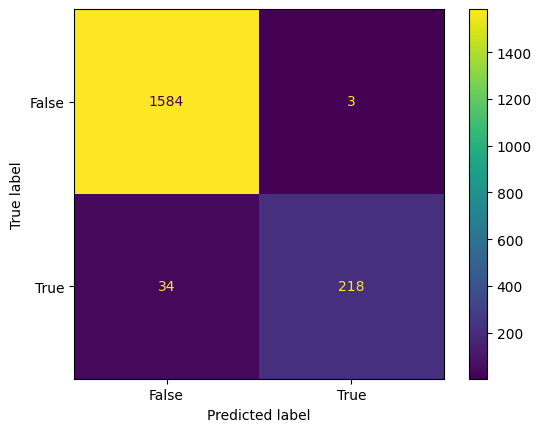

In [137]:
cm = confusion_matrix(y_test, y_pred, labels=classifier.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                              display_labels=classifier.classes_)
disp.plot()

In [134]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

       False       0.98      1.00      0.99      1587
        True       0.99      0.87      0.92       252

    accuracy                           0.98      1839
   macro avg       0.98      0.93      0.96      1839
weighted avg       0.98      0.98      0.98      1839

